**Task-2 Graduate Rotational Internship Program (GRIP - June 2023) organised by The Sparks Foundation.**

**Author: Puja Mahankuda (Intern June 2023)**

From the given ‘Iris’ dataset, predicting the optimum number of clusters and representing it visually.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [ ]:
i = datasets.load_iris()
iris = pd.DataFrame(i.data, columns = i.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**To find optimum number of clusters for K Means.**

* The Elbow Method will be used to determine the ideal number of clusters for K Means.
* To do this, we must plot the graph of inertia.
* How far apart the points in a cluster are can be determined by inertia. Therefore, a minimal amount of inertia is desired. The value range for inertia starts at zero and increases.



**Calculating inertia**

In [ ]:
x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = [] #within cluster sum of squares 

for i in range(1, 11):
    k = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    k.fit(x)
    wcss.append(k.inertia_)

**Plotting of Inertia Graph**

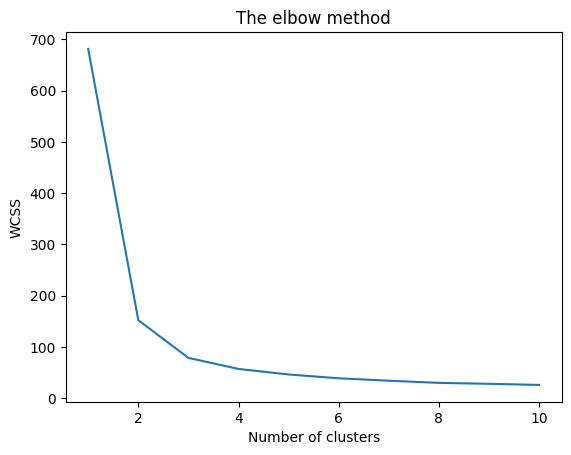

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

* Where the elbow occurs is where the clusters are best.
* After 3, the graph's slope starts to gradually decline, which indicates that the algorithm has almost reached convergence.
* We can state that three clusters work best.


**Creating the kmeans classifier**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

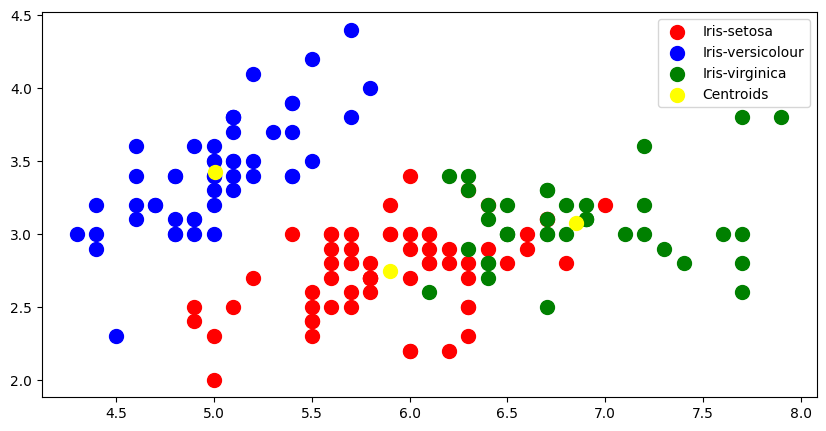

In [ ]:
#Plotting of clusters
plt.figure(figsize=(10,5)) #on the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()